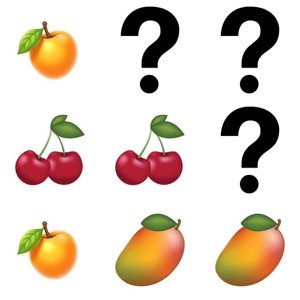

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import random
import time

# === CONFIGURATION ===
TILE_SIZE = (100, 100)
image_paths = ["fruit1.jpg", "fruit2.jpg", "fruit3.jpg", "fruit4.jpg"]
cover_img_path = "cover.png"

def load_images():
    # Create list with each image twice, then one random to make 9 tiles
    tile_images = image_paths[:4] * 2
    tile_images.append(random.choice(image_paths[:4]))
    random.shuffle(tile_images)
    images = [Image.open(path).convert("RGB").resize(TILE_SIZE) for path in tile_images]
    return [images[i:i+3] for i in range(0, 9, 3)]

def draw_board():
    board = Image.new('RGB', (3 * TILE_SIZE[0], 3 * TILE_SIZE[1]))
    for i in range(3):
        for j in range(3):
            tile = board_images[i][j] if state[i][j] == '🟩' or matched[i][j] else cover_img
            board.paste(tile, (j * TILE_SIZE[0], i * TILE_SIZE[1]))
    clear_output(wait=True)
    display(board)

def play_turn(row, col):
    global flips, matched_sets

    if matched[row][col] or state[row][col] != '⬜':
        print("⛔ Invalid move.")
        return

    state[row][col] = '🟩'
    flips.append((row, col))
    draw_board()

    if len(flips) == 2:
        r1, c1 = flips[0]
        r2, c2 = flips[1]

        if np.array_equal(np.array(board_images[r1][c1]), np.array(board_images[r2][c2])):
            print("✅ Correct Guess! It's a Match!")
            matched[r1][c1] = matched[r2][c2] = True
            matched_sets += 1
        else:
            print("❌ Oops! Try again.")
            time.sleep(1.5)
            state[r1][c1] = state[r2][c2] = '⬜'

        flips.clear()
        draw_board()

def play_tile(tile_number):
    if tile_number < 1 or tile_number > 9:
        print("❌ Invalid tile number. Choose between 1 and 9.")
        return
    row = (tile_number - 1) // 3
    col = (tile_number - 1) % 3
    play_turn(row, col)

def reveal_all():
    for i in range(3):
        for j in range(3):
            state[i][j] = '🟩'
    draw_board()

def is_game_over():
    return matched_sets == 4  # 4 correct matches of 2 = 8 tiles

def play_game():
    global board_images, cover_img, state, matched, flips, matched_sets

    # Reset all game state
    board_images = load_images()
    cover_img = Image.open(cover_img_path).convert("RGB").resize(TILE_SIZE)
    state = np.full((3, 3), '⬜')
    matched = np.zeros((3, 3), dtype=bool)
    flips = []
    matched_sets = 0

    draw_board()

    while True:
        try:
            if is_game_over():
                print("🎉 Congratulations! You matched all the tiles and won the game!")
                reveal_all()
                break

            first = int(input("Flip first tile (1–9): "))
            play_tile(first)

            while True:
                second = int(input("Flip second tile (1–9): "))
                if second == first:
                    print("⛔️ You already flipped that tile. Choose a different one.")
                    continue
                play_tile(second)
                break

        except ValueError:
            print("❌ Please enter a valid number between 1 and 9.")

# === GAME LOOP ===
while True:
    play_game()
    again = input("🔁 Do you want to play again? (yes/no): ").strip().lower()
    if again not in ['yes', 'y']:
        print("👋 Thanks for playing!")
        break
